In [1]:
import sympy  as sp
from sympy import *
import numpy as np
#Para resolver sistemas de ecuaciones diferencials 
from sympy.solvers.ode.systems import dsolve_system
from IPython.display import display, Math

from libreria_geometria import componentes_tensor_riemann, componentes_tensor_curvatura, componentes_tensor_ricci, curvatura_escalar

In [2]:
sp.interactive.printing.init_printing(use_latex=True)

In [5]:
#Declaración de las variables que vamos a usar
x, y= sp.symbols('x y')
#Vector con las variables que vamos a usar 
variables = [x,y]

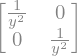

In [6]:
#Expreso la métrica en forma matricial 
g = sp.Matrix([[1/y**2,0],[0,1/y**2]])
g

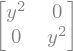

In [5]:
#Esto es para poder hacerlo en python y no en sympy que es horrible
g = [[1/y**2,0],[0,1/y**2]]

#SOLO SIRVE PARA MATRICES DIAGONALES 
g_inv = [[i for i in v] for v in g]
for i in range(len(g_inv)):
    for j in range(len(g_inv)):
        if g_inv[i][j]!= 0:
            g_inv[i][i]= g_inv[i][i]**-1
#Para ver bonita la matriz inversa 
g_inv_sp  = Matrix(g_inv)
g_inv_sp
        

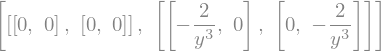

In [6]:
#Este vector va a contener la matriz g derivada respecto de cada la variable
#Por ejemplo derivadas_variable[0] es la derivada de toda la matriz respecto de t
#            derivadas_variable[1] es la derivada de toda la matriz respecto de x
#Y derivadas_variable[1][0][0] es la derivad parcial de g_{0,0} respecto x
# y así sucesivamente 
derivadas_variable = []

for variable in variables: 
    derivada_variable = [[0 for i in variables] for j in variables]
    for i in range(len(variables)):
        for j in range(len(variables)): 
            funcion = g[i][j]
            #Para no hacer la derivada de un número 
            if type(funcion) == sp.core.mul.Mul or type(funcion) == sp.core.power.Pow: 
                derivada_variable[i][j] = simplify(funcion.diff(variable))
                
    derivadas_variable.append(derivada_variable)
derivadas_variable

In [7]:


#Esta matriz va a tener los simbolos de chistoffle 
#Por ejemplo, simbolo_chirtoffle[2][0][1] sería \gamma^y_{t,x}
simbolos_chistoffle = [[[0 for j in variables] for i in variables] for m in variables]


for m in range(len(variables)):
    for i in range(len(variables)):
        for j in range(len(variables)):
            simbolo = 0
            #El sumatorio respecto del indice libre l 
            for l in range(len(variables)):
                #Para evitar hacer una multiplicación por 0 
                if  g_inv[m][l] != 0: 
                    simbolo =simbolo + g_inv[m][l]*(derivadas_variable[j][i][l]+derivadas_variable[i][j][l]-derivadas_variable[l][i][j])
            #Aquí multiplico  por el 1/2 que hemos sacado de factor común 
            simbolo =1/2*simbolo
            simbolos_chistoffle[m][i][j] = simplify(simbolo)

In [10]:
for i in range(len(simbolos_chistoffle)):
    for j in range(len(simbolos_chistoffle)):
        for k in range(len(simbolos_chistoffle)):
            display(Math(f'\Gamma^{variables[i]}_{{{variables[j]},{variables[k]}}} = ' +latex(simbolos_chistoffle[i][j][k])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
#Variable para poder derivar 
tau = sp.symbols("tau")

#Defino las derivadas, esto para poder resolverlo 
dx = sp.Function("dx")(tau)
dy = sp.Function('dy')(tau) 

#Quitamos dz
variables_derivadas = [dx,dy]


In [12]:
geodesicas = [i.diff(tau) for i in variables_derivadas]

for variable in range(len(variables)): 
    for i in range(len(variables)):
        for j in range(len(variables)):
            geodesicas[variable] = geodesicas[variable] +simplify( simbolos_chistoffle[variable][i][j]*variables_derivadas[i]*variables_derivadas[j])
    geodesicas[variable] = sp.Eq(geodesicas[variable],0)
    


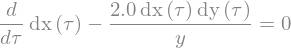

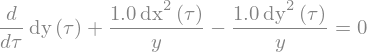

In [13]:
for v in geodesicas: 
    display(v)

In [52]:
x = sp.Function('x')(tau)
y = sp.Function('y')(tau)

In [53]:
u_0 =  sp.Function('u_0')(tau)
u_1 = sp.Function("u_1")(tau)

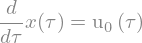

In [54]:
dx = sp.Eq(x.diff(tau),u_0)
dx

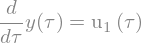

In [55]:
dy = sp.Eq(y.diff(tau),u_1)
dy

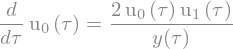

In [56]:
du_0 = sp.Eq(u_0.diff(tau),2*u_0*u_1/y)
du_0

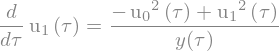

In [57]:
du_1 = sp.Eq(u_1.diff(tau),(-u_0**2+u_1**2)/y )
du_1

In [58]:
dsolve_system([dx,dy,du_0,du_1],
              ics={x(0):10,y(0):20,u_0(0):5,u_1(0):20},
              t = tau)

TypeError: 'x' object is not callable

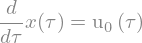

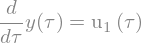

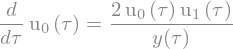

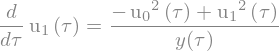

In [37]:
display(dx)
display(dy)
display(du_0)
display(du_1)

In [9]:
f, g = symbols("f g", cls=Function)

x,y = symbols("x y")
eqs = [Eq(f(x).diff(x), g(x)), Eq(g(x).diff(x), f(x))]

dsolve_system(eqs)

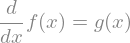

In [51]:
Eq(f(x).diff(x), g(x))

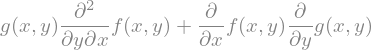

In [20]:
(g(x,y)*(f(x,y).diff(x))).diff(y)

### Tensor curvatura de Riemann

In [24]:
R = componentes_tensor_riemann(g, variables)
for l in range(len(variables)):
    for i in range(len(variables)):
        for j in range(len(variables)):
            for k in range(len(variables)):
                if R[l][i][j][k] != 0:        
                    display(Math(f'R^{{{variables[l]}}}_{{{{{variables[i]},{variables[j]},{variables[k]}}}}} = ' +latex(sp.simplify(R[l][i][j][k]))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Tensor Curvatura

In [25]:
R = componentes_tensor_curvatura(g,variables)
for l in range(len(variables)):
    for i in range(len(variables)):
        for j in range(len(variables)):
            for k in range(len(variables)):
                if R[l][i][j][k] != 0:        
                    display(Math(f'R_{{{{{variables[l]},{variables[i]},{variables[j]},{variables[k]}}}}} = ' +latex(R[l][i][j][k])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Componentes del tensor de Ricci

In [26]:
Ricci_curv = componentes_tensor_ricci(g,variables)
for i in range(len(variables)):
    for j in range(len(variables)):
        if Ricci_curv[i][j] != 0:        
            display(Math(f'R_{{{{{variables[i]},{variables[j]}}}}} = '+latex(Ricci_curv[i][j])))
            

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Curvatura esclar

In [8]:
curvatura_escalar(g,variables)